# Выполнил Воронцов Александр

## Загрузка данных (2 балла)

### Для просмотра, придётся пожертвовать своим токеном =)

In [1]:
import vk
token='020611bf05ccd93fc45058afe821acea42627107f2cd9f95c416dc18b6fb0fa265277570339ebaf0f2188' 
session = vk.Session(access_token = token) # открыть сессию для работы
api = vk.API(session) # подключиться к API

#### Буду брать данные из паблика "Подслушано ДСЛ" - сеть студентов МГУ, которые живут в общежитии

In [2]:
group = 'overhear_dsl'

In [3]:
n = 4000 # Паблик на 4100 человек, но каждый день эта цифра дёргается, поэтому ограничемся 4000
from time import sleep
import networkx as nx

In [4]:
best_graph_in_the_world = nx.Graph()
# best_graph_in_the_world.graph['title'] = 'Best graph in the world' #  При загрузке графа в Gephi возникает ошибка, если наш граф имеет атрибут title

#### Достаю группами по 100 человек и сразу добавляю вершины в наш граф, причем один из параметров - город, поэтому людей без города в профиле откидываем сразу

In [5]:
array_of_members = []
for i in range(2, int(n/100) + 1):
    res2 = api.groups.getMembers(group_id = group, count = 100, offset = 100*i, fields = 'sex, city, photo_50', v = 5.73)
    items2 = res2['items']
    for item in items2:
        if 'city' in item: 
            array_of_members.append(item)
            best_graph_in_the_world.add_node(item['first_name']+' '+item['last_name'])
    sleep(0.5)

#### Теперь выкинем людей с закрытым профилем, они нам тоже не интересны

In [6]:
array_norm_members = []
for i in range(0, len(array_of_members), 60):
    S = []
    for j in range(i, min(i+60, len(array_of_members))):
        S.append(array_of_members[j]['id'])
    D = api.users.get(user_ids = S, v = 5.89)
    for j in D:
        if j['is_closed'] == False:
            array_norm_members.append(j)
    sleep(0.5)

#### В задании просят id, поэтому создадим массив с id

In [7]:
id_array_norm_members=[]
for i in array_norm_members:
    id_array_norm_members.append(i['id'])

#### Заполняем наш граф по принципу: если участники сообщества дружат - провести между ними ребро

In [8]:
def from_id_to_member(a):
    for i in range(len(id_array_norm_members)):
        if id_array_norm_members[i] == a:
            return array_norm_members[i]

In [10]:
from tqdm import tqdm
for i in tqdm(array_norm_members):
    dru = api.friends.get(source_uid = i['id'], v = 5.126)
    for k in dru['items']:
        if k in id_array_norm_members:
            best_graph_in_the_world.add_edge(from_id_to_member(k)['first_name']+' '+from_id_to_member(k)['last_name'], i['first_name']+' '+i['last_name'])
    sleep(0.3)

100%|██████████| 2372/2372 [14:23<00:00,  2.75it/s]


#### Отрисуем наш граф не по красоте, но сохраним по красоте.

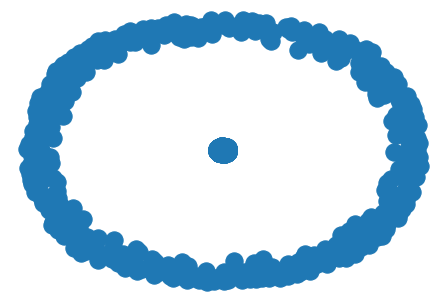

In [11]:
nx.draw_spring(best_graph_in_the_world)

In [12]:
nx.write_edgelist(best_graph_in_the_world, 'graph.edglist')
nx.write_graphml(best_graph_in_the_world, 'graph.gml')
nx.write_graphml(best_graph_in_the_world, 'graph.graphml')

## Визуализация (1 балл)

### Выбрал алгоритм Force Atlas
#### Имеются некоторые выбросы (внешний круг), хотя закрытые профиля я отбрасывал сразу. Почему же? 
#### На самом деле на граф с 2700+ вершинами это не очень много, а объяснить можно тем, что не у всех людей друзья состоят в этом паблике (например, первокурсники) или у людей скрыты друзья. Поэтому такой результат вполне оправдан.

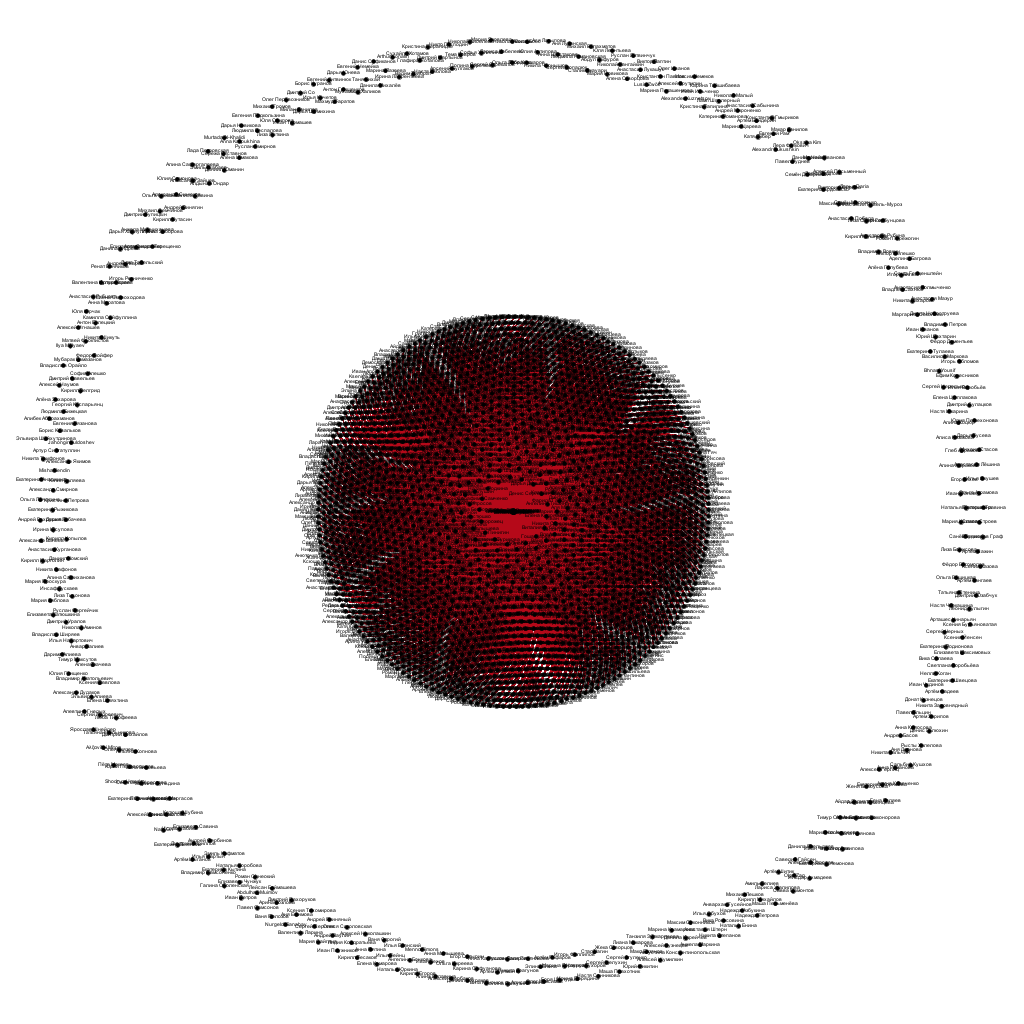

In [13]:
from IPython.display import Image
Image("Vorontsov.png")

## Центральности вершин (2 балла)

### Зададим цвета вершинам от белого до коричневого, чем темнее тем больше degree. 

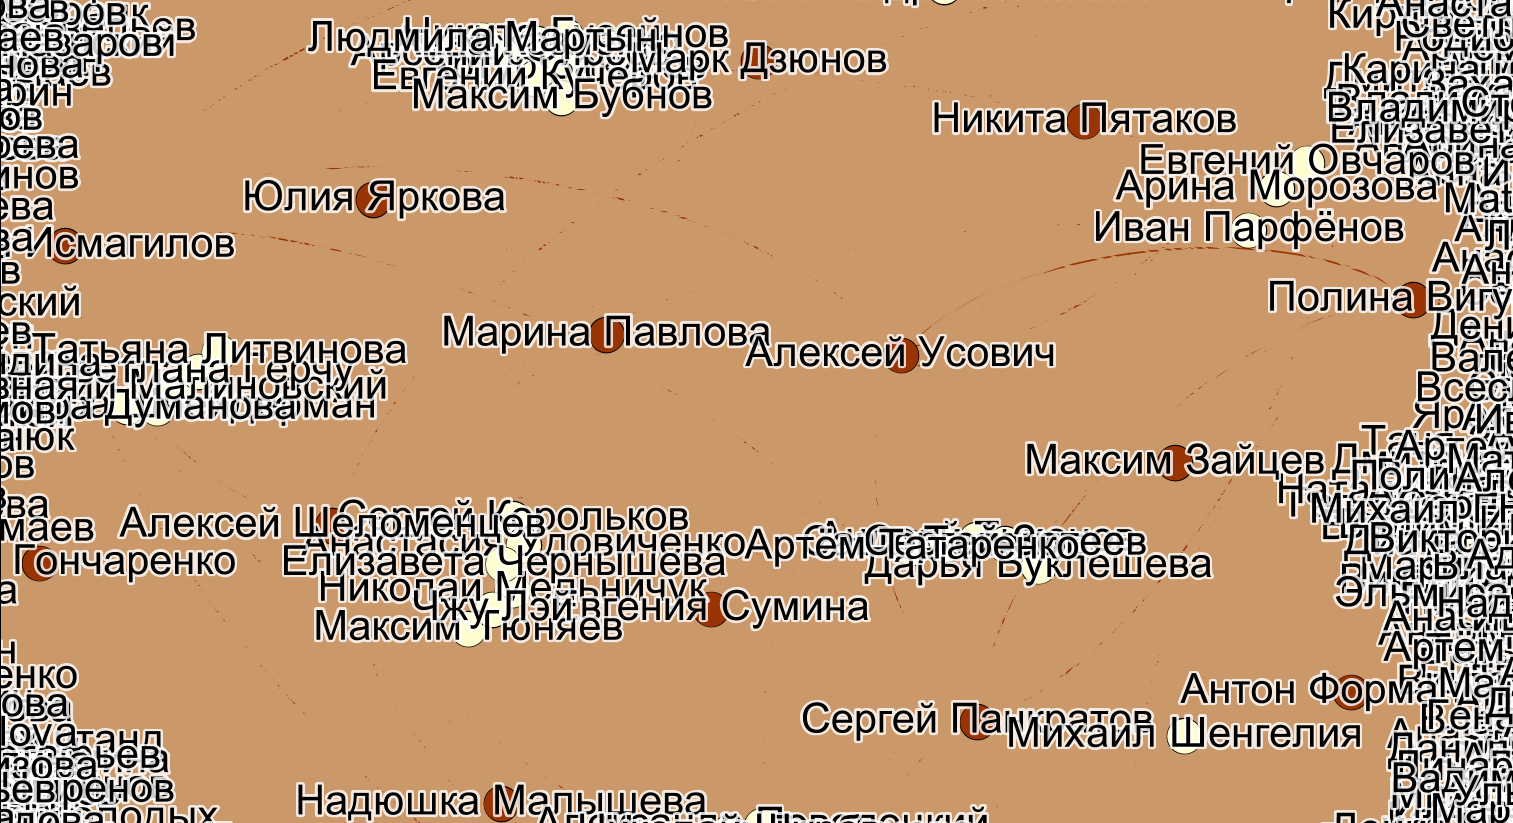

In [22]:
Image("Vorontsov2.png")

### Здесь приведу кусок графа, дабы нагляднее объяснить.
### Я лично знаком с Мариной Павловой, Никитой Пятоковым, Алексеем Усовичем, Сергеем Панкратовым и многими на этом рисунке. 
### Все они учатся на 3 курсе, а в ДСЛ, как правило, люди живут не больше 3 лет. То есть старшекурсники более влиятельны в плане связей.

## Сообщества... в сообществе (2 балла)

In [36]:
best_dict = nx.algorithms.centrality.edge_betweenness_centrality(best_graph_in_the_world)

In [39]:
from sklearn import cluster as cl

In [41]:
db = cl.DBSCAN(metric_params=best_dict)

In [42]:
db

DBSCAN(metric_params={('Alice Ross', 'Tim Dzhankishiev'): 2.6591275768416332e-05,
                      ('Alice Ross', 'Алексей Усович'): 2.6591275768416332e-05,
                      ('Alice Ross', 'Алексей Шеломенцев'): 2.6591275768416332e-05,
                      ('Alice Ross', 'Алишер Ибрагимов'): 2.6591275768416332e-05,
                      ('Alice Ross', 'Антон Форманчук'): 2.6591275768416332e-05,
                      ('Alice Ross', 'Арсен Исмагилов'): 2.6591275768416332e-05,...
                      ('Alina Pavlova', 'Алексей Усович'): 2.6591275768416606e-05,
                      ('Alina Pavlova', 'Алексей Шеломенцев'): 2.6591275768416606e-05,
                      ('Alina Pavlova', 'Алишер Ибрагимов'): 2.6591275768416606e-05,
                      ('Alina Pavlova', 'Арсен Исмагилов'): 2.6591275768416606e-05,
                      ('Alina Pavlova', 'Влад Анкудинов'): 2.6591275768416606e-05,
                      ('Alina Pavlova', 'Вячеслав Пономарёв'): 2.6591275768416606e-05

### К сожалению этот пункт совсем не понятен =(